In [1]:
from google.colab import drive
#drive.mount('/gdrive')
drive.mount('/gdrive', force_remount=True)
%cd /gdrive

Mounted at /gdrive
/gdrive


In [2]:
import sys
sys.path.append('/gdrive/My Drive/Colab Notebooks/rl_parkingplacefinder')
print(sys.path)

['', '/env/python', '/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.6/dist-packages/IPython/extensions', '/root/.ipython', '/gdrive/My Drive/Colab Notebooks/rl_parkingplacefinder']


In [3]:
import simple_q_learning
from simple_q_learning import *

import Parking_lot
from Parking_lot import *
from Park_Finder_Agent import Park_Finder_Agent
from Park_Finder_Agent import Reward_Parameters



/usr/local/lib/python3.6/dist-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


## Example Changes on Alpha
Alpha represents the learning rate. 


Start learning: 12-12-19 03 42 58 - nr episodes: 60000
nr_occupied_parking_slots: 13
best parking slot: 39
best_walk_distance: 3


/gdrive/My Drive/Colab Notebooks/rl_parkingplacefinder/Parking_lot.py:215: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


End learning: 12-12-19 03 44 11


<Figure size 432x288 with 0 Axes>

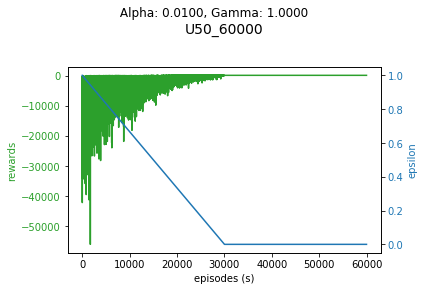

--- Frame summary -----------
Timestep: 60000
Resulting state: 39
Path lenght: 12
Reward: 89
Found parking: True
Walking distance: 3
Driving distance: 9
Start learning: 12-12-19 03 44 12 - nr episodes: 60000
nr_occupied_parking_slots: 13
best parking slot: 39
best_walk_distance: 3


End learning: 12-12-19 03 45 23


<Figure size 432x288 with 0 Axes>

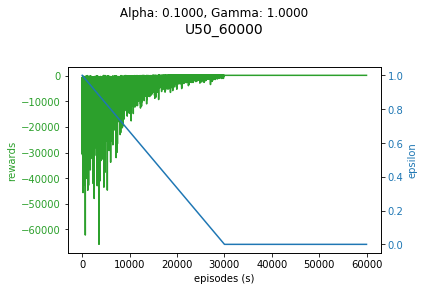

--- Frame summary -----------
Timestep: 60000
Resulting state: 39
Path lenght: 12
Reward: 89
Found parking: True
Walking distance: 3
Driving distance: 9
Start learning: 12-12-19 03 45 23 - nr episodes: 60000
nr_occupied_parking_slots: 13
best parking slot: 39
best_walk_distance: 3


End learning: 12-12-19 03 46 34


<Figure size 432x288 with 0 Axes>

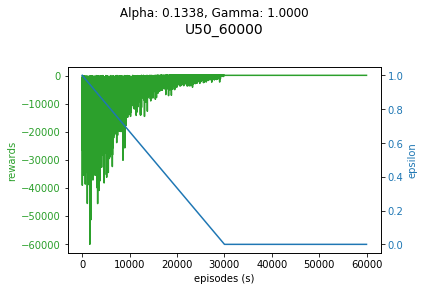

--- Frame summary -----------
Timestep: 60000
Resulting state: 39
Path lenght: 12
Reward: 89
Found parking: True
Walking distance: 3
Driving distance: 9
Start learning: 12-12-19 03 46 35 - nr episodes: 60000
nr_occupied_parking_slots: 13
best parking slot: 39
best_walk_distance: 3


End learning: 12-12-19 03 47 59


<Figure size 432x288 with 0 Axes>

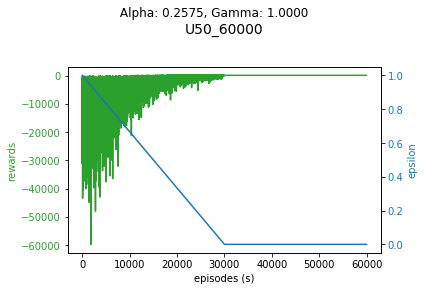

--- Frame summary -----------
Timestep: 60000
Resulting state: 39
Path lenght: 12
Reward: 89
Found parking: True
Walking distance: 3
Driving distance: 9
Start learning: 12-12-19 03 48 00 - nr episodes: 60000
nr_occupied_parking_slots: 13
best parking slot: 39
best_walk_distance: 3


End learning: 12-12-19 03 49 30


<Figure size 432x288 with 0 Axes>

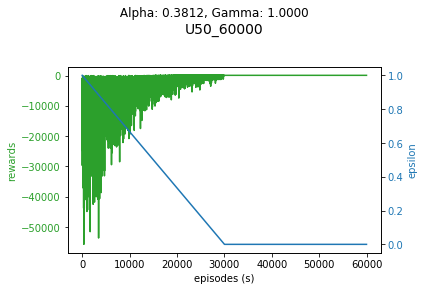

--- Frame summary -----------
Timestep: 60000
Resulting state: 39
Path lenght: 12
Reward: 89
Found parking: True
Walking distance: 3
Driving distance: 9
Start learning: 12-12-19 03 49 31 - nr episodes: 60000
nr_occupied_parking_slots: 13
best parking slot: 39
best_walk_distance: 3


End learning: 12-12-19 03 50 52


<Figure size 432x288 with 0 Axes>

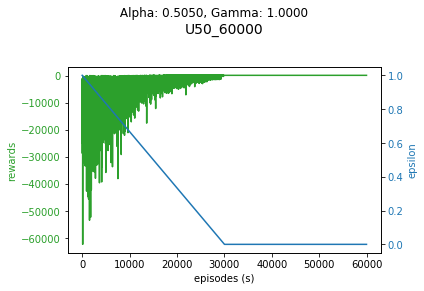

--- Frame summary -----------
Timestep: 60000
Resulting state: 39
Path lenght: 12
Reward: 89
Found parking: True
Walking distance: 3
Driving distance: 9
Start learning: 12-12-19 03 50 53 - nr episodes: 60000
nr_occupied_parking_slots: 13
best parking slot: 39
best_walk_distance: 3


End learning: 12-12-19 03 52 18


<Figure size 432x288 with 0 Axes>

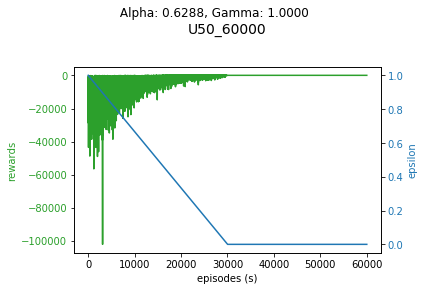

--- Frame summary -----------
Timestep: 60000
Resulting state: 39
Path lenght: 12
Reward: 89
Found parking: True
Walking distance: 3
Driving distance: 9
Start learning: 12-12-19 03 52 19 - nr episodes: 60000
nr_occupied_parking_slots: 13
best parking slot: 39
best_walk_distance: 3


End learning: 12-12-19 03 53 44


<Figure size 432x288 with 0 Axes>

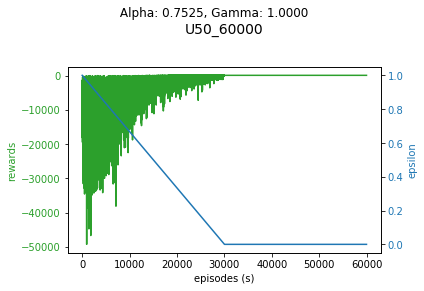

--- Frame summary -----------
Timestep: 60000
Resulting state: 39
Path lenght: 12
Reward: 89
Found parking: True
Walking distance: 3
Driving distance: 9
Start learning: 12-12-19 03 53 45 - nr episodes: 60000
nr_occupied_parking_slots: 13
best parking slot: 39
best_walk_distance: 3


End learning: 12-12-19 03 55 14


<Figure size 432x288 with 0 Axes>

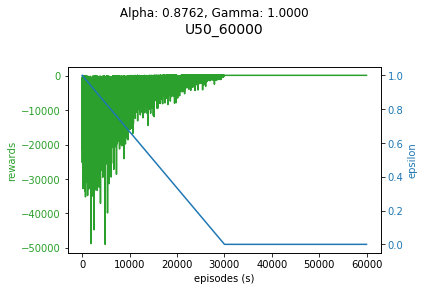

--- Frame summary -----------
Timestep: 60000
Resulting state: 39
Path lenght: 12
Reward: 89
Found parking: True
Walking distance: 3
Driving distance: 9
Start learning: 12-12-19 03 55 14 - nr episodes: 60000
nr_occupied_parking_slots: 13
best parking slot: 39
best_walk_distance: 3


End learning: 12-12-19 03 56 23


<Figure size 432x288 with 0 Axes>

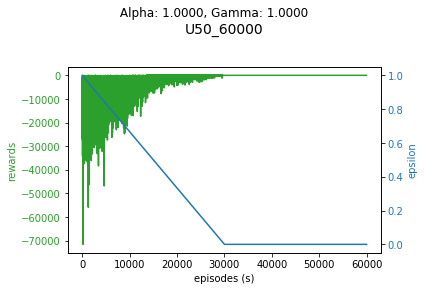

--- Frame summary -----------
Timestep: 60000
Resulting state: 30
Path lenght: 7
Reward: 2.333
Found parking: True
Walking distance: 6
Driving distance: 6


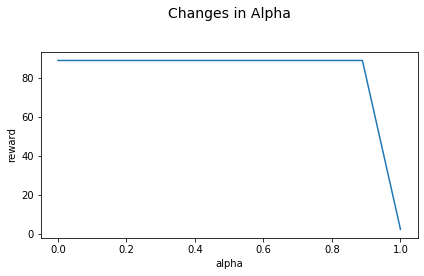

In [7]:
utils = Utils()
agent, lmp, parking_environment, file_sufix = create_base_test_scenario(nr_episodes=60000)

values_alpha = np.linspace(0.01, 1, 9) # valid range: 0 < a <= 1
values_alpha = np.append(values_alpha,[0.1]) # because is the base model parameter, we want to include it in the test
values_alpha.sort()

last_frames = []

for v_alpha in values_alpha:
    Q = {}
    Q_1 = {}
    for state in agent.stateSpacePlus:
        for action in agent.possibleActions:
            Q[state, action] = 0

    lmp.ALPHA = v_alpha
    Q_1, last_frame = doLearning(agent=agent, parking_environment=parking_environment, 
                        Q=Q, lmp=lmp, save_qt=False, save_frames=False,
                        plot_rewards=True)
    last_frames.append(last_frame)
    utils.print_frame_summary(last_frame)

plot_field_from_last_frames(frames=last_frames, field_name='reward',
                              x_range=values_gamma, x_label='alpha', title_str='Changes in Alpha')


## Example Changes on Gamma


Start learning: 12-12-19 02 59 21 - nr episodes: 60000
nr_occupied_parking_slots: 6
best parking slot: 40
best_walk_distance: 2


/gdrive/My Drive/Colab Notebooks/rl_parkingplacefinder/Parking_lot.py:215: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()



End learning: 12-12-19 03 00 17


<Figure size 432x288 with 0 Axes>

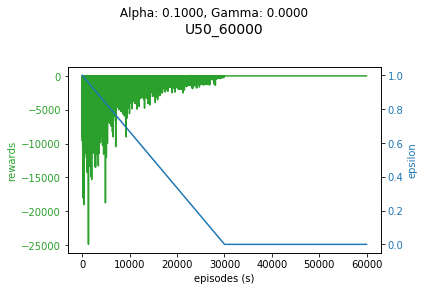

--- Frame summary -----------
Timestep: 60000
Resulting state: 36
Path lenght: 9
Reward: 0.3330000000000002
Found parking: True
Walking distance: 6
Driving distance: 6
Start learning: 12-12-19 03 00 17 - nr episodes: 60000
nr_occupied_parking_slots: 6
best parking slot: 40
best_walk_distance: 2



End learning: 12-12-19 03 01 05


<Figure size 432x288 with 0 Axes>

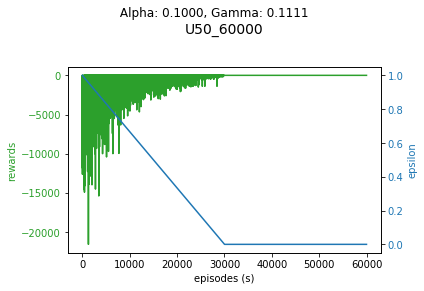

--- Frame summary -----------
Timestep: 60000
Resulting state: 8
Path lenght: 3
Reward: 3.0
Found parking: True
Walking distance: 10
Driving distance: 2
Start learning: 12-12-19 03 01 06 - nr episodes: 60000
nr_occupied_parking_slots: 6
best parking slot: 40
best_walk_distance: 2



End learning: 12-12-19 03 01 52


<Figure size 432x288 with 0 Axes>

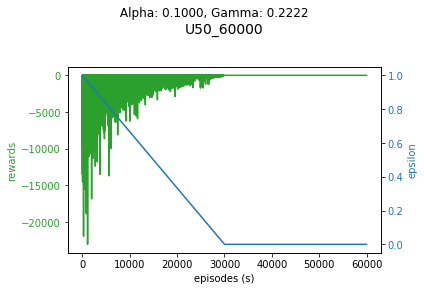

--- Frame summary -----------
Timestep: 60000
Resulting state: 8
Path lenght: 3
Reward: 3.0
Found parking: True
Walking distance: 10
Driving distance: 2
Start learning: 12-12-19 03 01 53 - nr episodes: 60000
nr_occupied_parking_slots: 6
best parking slot: 40
best_walk_distance: 2



End learning: 12-12-19 03 02 40


<Figure size 432x288 with 0 Axes>

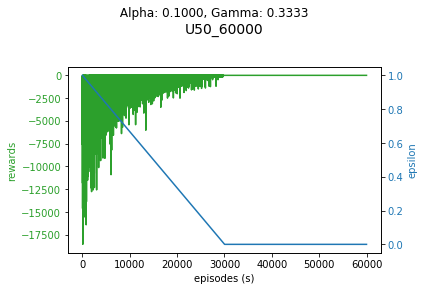

--- Frame summary -----------
Timestep: 60000
Resulting state: 8
Path lenght: 3
Reward: 3.0
Found parking: True
Walking distance: 10
Driving distance: 2
Start learning: 12-12-19 03 02 40 - nr episodes: 60000
nr_occupied_parking_slots: 6
best parking slot: 40
best_walk_distance: 2



End learning: 12-12-19 03 03 27


<Figure size 432x288 with 0 Axes>

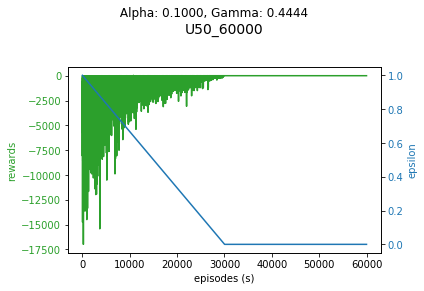

--- Frame summary -----------
Timestep: 60000
Resulting state: 8
Path lenght: 3
Reward: 3.0
Found parking: True
Walking distance: 10
Driving distance: 2
Start learning: 12-12-19 03 03 27 - nr episodes: 60000
nr_occupied_parking_slots: 6
best parking slot: 40
best_walk_distance: 2



End learning: 12-12-19 03 04 14


<Figure size 432x288 with 0 Axes>

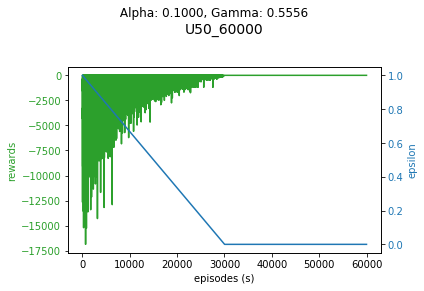

--- Frame summary -----------
Timestep: 60000
Resulting state: 8
Path lenght: 3
Reward: 3.0
Found parking: True
Walking distance: 10
Driving distance: 2
Start learning: 12-12-19 03 04 15 - nr episodes: 60000
nr_occupied_parking_slots: 6
best parking slot: 40
best_walk_distance: 2



End learning: 12-12-19 03 05 02


<Figure size 432x288 with 0 Axes>

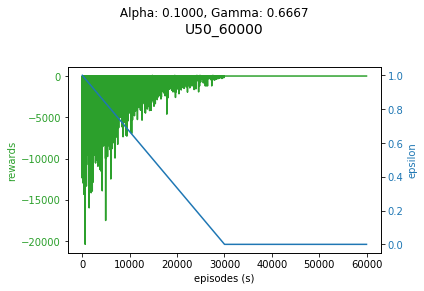

--- Frame summary -----------
Timestep: 60000
Resulting state: 8
Path lenght: 3
Reward: 3.0
Found parking: True
Walking distance: 10
Driving distance: 2
Start learning: 12-12-19 03 05 03 - nr episodes: 60000
nr_occupied_parking_slots: 6
best parking slot: 40
best_walk_distance: 2



End learning: 12-12-19 03 06 15


<Figure size 432x288 with 0 Axes>

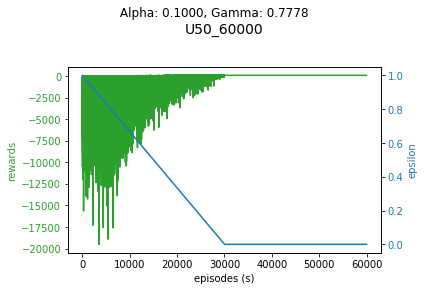

--- Frame summary -----------
Timestep: 60000
Resulting state: 40
Path lenght: 13
Reward: 88
Found parking: True
Walking distance: 2
Driving distance: 10
Start learning: 12-12-19 03 06 16 - nr episodes: 60000
nr_occupied_parking_slots: 6
best parking slot: 40
best_walk_distance: 2



End learning: 12-12-19 03 07 30


<Figure size 432x288 with 0 Axes>

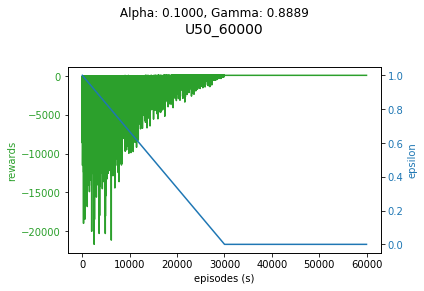

--- Frame summary -----------
Timestep: 60000
Resulting state: 40
Path lenght: 13
Reward: 88
Found parking: True
Walking distance: 2
Driving distance: 10
Start learning: 12-12-19 03 07 30 - nr episodes: 60000
nr_occupied_parking_slots: 6
best parking slot: 40
best_walk_distance: 2



End learning: 12-12-19 03 08 15


<Figure size 432x288 with 0 Axes>

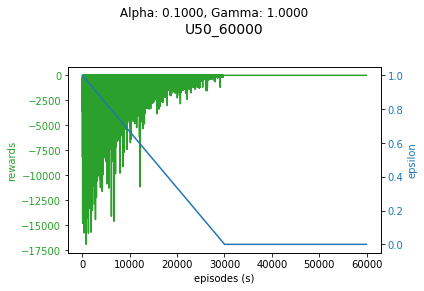

--- Frame summary -----------
Timestep: 60000
Resulting state: 8
Path lenght: 3
Reward: 3.0
Found parking: True
Walking distance: 10
Driving distance: 2


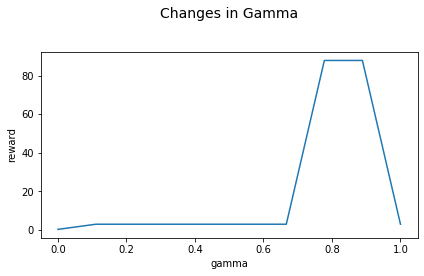

In [4]:
utils = Utils()
agent, lmp, parking_environment, file_sufix = create_base_test_scenario(nr_episodes=60000)

values_gamma = np.linspace(0.0, 1.0, 10)
last_frames = []

for v_gamma in values_gamma:
    Q = {}
    Q_1 = {}
    for state in agent.stateSpacePlus:
        for action in agent.possibleActions:
            Q[state, action] = 0

    lmp.GAMMA = v_gamma
    Q_1, last_frame = doLearning(agent=agent, parking_environment=parking_environment, 
                        Q=Q, lmp=lmp, save_qt=False, save_frames=False,
                        plot_rewards=True)
    last_frames.append(last_frame)
    utils.print_frame_summary(last_frame)

plot_field_from_last_frames(frames=last_frames, field_name='reward',
                              x_range=values_gamma, x_label='gamma', title_str='Changes in Gamma')
